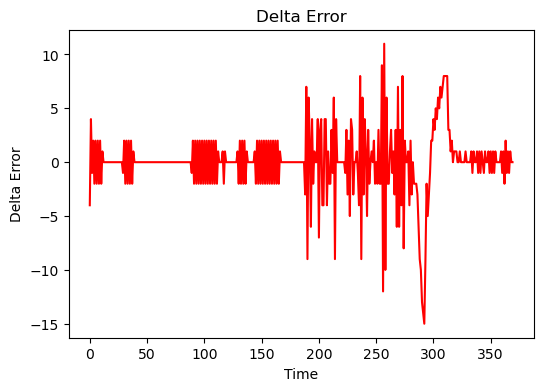

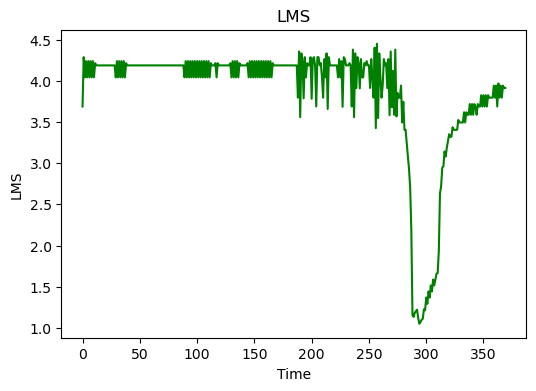

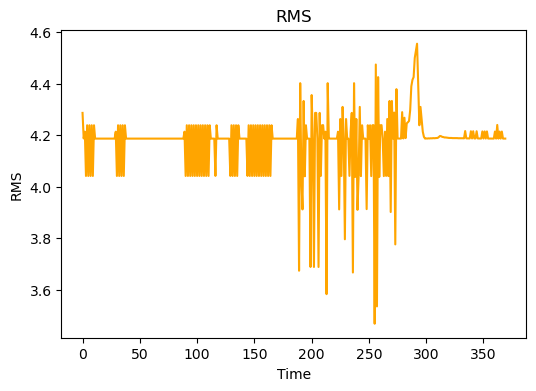

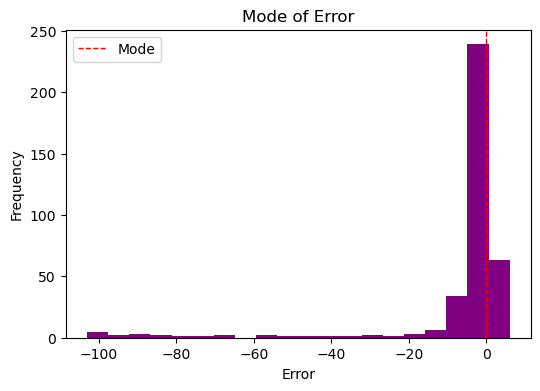

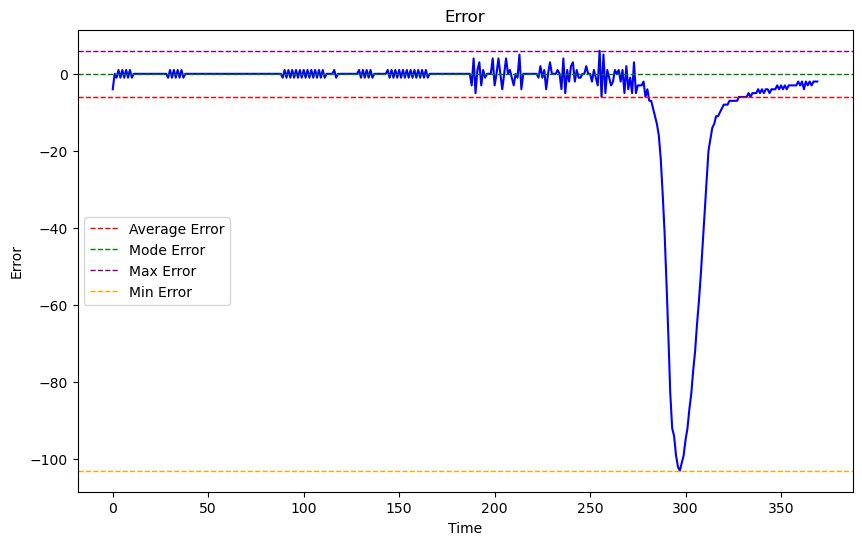

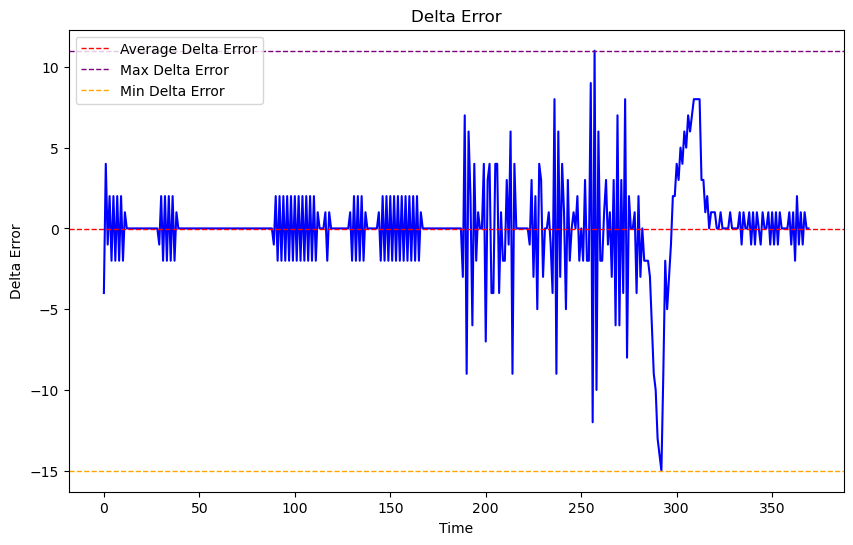

Rise Time: 0
Settling Time: 369
Average Error: -6.01
Average Delta Error: -0.01
Mode Error: 0.0
Max Error: 6.0
Min Error: -103.0
Max Delta Error: 11.0
Min Delta Error: -15.0


In [4]:
import csv
import matplotlib.pyplot as plt
from statistics import mode
import numpy as np

# Membaca data dari file CSV
errors = []
delta_errors = []
lms_values = []
rms_values = []

with open('robot_readings.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        errors.append(float(row[0]))
        delta_errors.append(float(row[1]))
        lms_values.append(float(row[2]))
        rms_values.append(float(row[3]))

# Plot Delta Error
plt.figure(figsize=(6, 4))
plt.plot(delta_errors, color='red')
plt.title('Delta Error')
plt.xlabel('Time')
plt.ylabel('Delta Error')
plt.show()

# Plot LMS
plt.figure(figsize=(6, 4))
plt.plot(lms_values, color='green')
plt.title('LMS')
plt.xlabel('Time')
plt.ylabel('LMS')
plt.show()

# Plot RMS
plt.figure(figsize=(6, 4))
plt.plot(rms_values, color='orange')
plt.title('RMS')
plt.xlabel('Time')
plt.ylabel('RMS')
plt.show()

# Plot Mode of Error
plt.figure(figsize=(6, 4))
plt.hist(errors, color='purple', bins=20)
plt.title('Mode of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.axvline(x=mode(errors), color='red', linestyle='dashed', linewidth=1)
plt.legend(['Mode'])
plt.show()

# Fungsi untuk menghitung rise time dan settling time
def calculate_rise_settling_time(values, tolerance=0.05):
    steady_state_value = values[-1]
    rise_time_start = steady_state_value * 0.1
    rise_time_end = steady_state_value * 0.9

    rise_time_start_index = np.where(np.array(values) >= rise_time_start)[0][0]
    rise_time_end_index = np.where(np.array(values) >= rise_time_end)[0][0]

    rise_time = rise_time_end_index - rise_time_start_index

    within_tolerance_indices = np.where(np.abs(np.array(values) - steady_state_value) <= tolerance * np.abs(steady_state_value))[0]
    if len(within_tolerance_indices) > 0:
        settling_time = within_tolerance_indices[-1]
    else:
        settling_time = len(values)

    return rise_time, settling_time

# Menghitung rise time dan settling time untuk error
rise_time, settling_time = calculate_rise_settling_time(errors)

# Menghitung nilai rata-rata dan modus
average_error = np.mean(errors)
average_delta_error = np.mean(delta_errors)
mode_error = mode(errors)

# Menemukan error dan delta error tertinggi dan terendah
max_error = max(errors)
min_error = min(errors)
max_delta_error = max(delta_errors)
min_delta_error = min(delta_errors)

# Plot Error
plt.figure(figsize=(10, 6))
plt.plot(errors, color='blue')
plt.title('Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.axhline(y=average_error, color='red', linestyle='--', linewidth=1, label='Average Error')
plt.axhline(y=mode_error, color='green', linestyle='--', linewidth=1, label='Mode Error')
plt.axhline(y=max_error, color='purple', linestyle='--', linewidth=1, label='Max Error')
plt.axhline(y=min_error, color='orange', linestyle='--', linewidth=1, label='Min Error')
plt.legend()
plt.show()

# Plot Delta Error
plt.figure(figsize=(10, 6))
plt.plot(delta_errors, color='blue')
plt.title('Delta Error')
plt.xlabel('Time')
plt.ylabel('Delta Error')
plt.axhline(y=average_delta_error, color='red', linestyle='--', linewidth=1, label='Average Delta Error')
plt.axhline(y=max_delta_error, color='purple', linestyle='--', linewidth=1, label='Max Delta Error')
plt.axhline(y=min_delta_error, color='orange', linestyle='--', linewidth=1, label='Min Delta Error')
plt.legend()
plt.show()

# Menampilkan nilai rise time dan settling time
print(f"Rise Time: {rise_time}")
print(f"Settling Time: {settling_time}")

# Menampilkan nilai rata-rata error, delta error, dan modus error
print(f"Average Error: {average_error:.2f}")
print(f"Average Delta Error: {average_delta_error:.2f}")
print(f"Mode Error: {mode_error}")

print(f"Max Error: {max_error}")
print(f"Min Error: {min_error}")
print(f"Max Delta Error: {max_delta_error}")
print(f"Min Delta Error: {min_delta_error}")